In [1]:
# import mrsensemakr, as well as pandas for data structures and statsmodels for regression
from mrsensemakr import mrsensemakr, mr_plots, traditional_mr
import pandas as pd
import statsmodels.formula.api as smf

In [2]:
# load simulated data 
sim_data = pd.read_csv('sim_data.csv')

In [3]:
# create vectors indicating variable names in the data
outcome = "out_trait"  # name of outcome trait
exposure = "exp_trait"  # name of exposure trait
instrument = "prs"  # genetic instrument (e.g, polygenic risk score)
age_sex = ["age", "sex"]  # age and sex variables (if applicable)
alc_smok = ["alcohol", "smoking"]  # putative pleoitropic vars.
pcs = ["pc"+str(i) for i in range(1, 21)]   # first 20 principal components pc1 ... pc20

In [4]:
# fit first stage and reduced form models to the data
fs_form = mrsensemakr.make_formula(y=exposure, x=[instrument])
first_stage_model = smf.ols(formula=fs_form, data=sim_data)
fitted_fs = first_stage_model.fit()
rf_form = mrsensemakr.make_formula(y=outcome, x=[instrument])
reduced_form_model = smf.ols(formula=rf_form, data=sim_data)
fitted_rf = reduced_form_model.fit()

In [5]:
# run MR sensitivity analysis and print results
mr_sense = mrsensemakr.MRSensemakr(outcome = outcome, exposure = exposure, instrument = instrument, covariates = age_sex + alc_smok + pcs, data = sim_data)
mrsensemakr.print_mr_sensemakr(mr_sense)

Sensitivity Analysis for Mendelian Randomization (MR)
 Exposure: exp_trait
 Outcome: out_trait
 Genetic instrument: prs

Traditional MR results (2SLS)
  MR Estimate (95% CI): 0.227 (0.192 - 0.262)
  P-value:  < 2e-16

Sensitivity generic instrument (prs) -> exposure (exp_trait)
  Partial R2: 1.451%
  RV (alpha = 0.05): 11.033%

Sensitivity generic instrument (prs) -> outcome (out_trait)
  Partial R2: 0.075%
  RV (alpha = 0.05): 2.267%


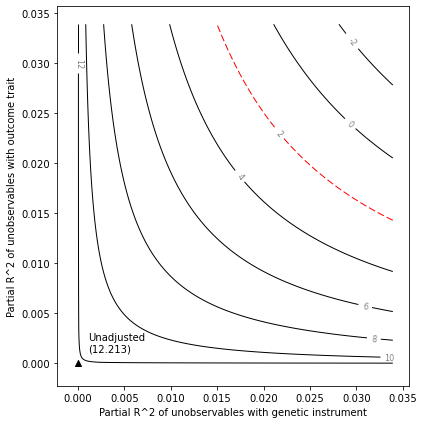

In [6]:
# make MR sensitivity contour plots
mr_plots.plot_mr_sensemakr(mr_sense, var_type='outcome')